In [3]:
import pandas as pd
####importing Required Packages####

import numpy as np # For linear algebra
import pandas as pd #For data processing
import matplotlib.pyplot as plt  # For data visualization
import re # For Regular Expression
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)
from geopy.geocoders import Nominatim
color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None) # Diplay max rows in notebook
pd.set_option('display.max_columns', None) # Diplay max rows in notebook

In [4]:
data = pd.read_csv("/content/wdi_data.csv") #importing data
data.head()



,Unnamed: 0,Year,value,indicator,Country Code,Country Name,Region,Income Group,Lending Type
0,0,2000,1.850994,AG.LND.FRST.ZS,AFG,Afghanistan,South Asia,Low income,IDA
1,1,2001,1.850994,AG.LND.FRST.ZS,AFG,Afghanistan,South Asia,Low income,IDA
2,2,2002,1.850994,AG.LND.FRST.ZS,AFG,Afghanistan,South Asia,Low income,IDA
3,3,2003,1.850994,AG.LND.FRST.ZS,AFG,Afghanistan,South Asia,Low income,IDA
4,4,2004,1.850994,AG.LND.FRST.ZS,AFG,Afghanistan,South Asia,Low income,IDA


In [5]:
data_2020 = data[data['Year'] == 2020 ]
data_2020.head()

,Unnamed: 0,Year,value,indicator,Country Code,Country Name,Region,Income Group,Lending Type
20,20,2020,1.850994,AG.LND.FRST.ZS,AFG,Afghanistan,South Asia,Low income,IDA
41,41,2020,28.791971,AG.LND.FRST.ZS,ALB,Albania,Europe & Central Asia,Upper middle income,IBRD
62,62,2020,0.818309,AG.LND.FRST.ZS,DZA,Algeria,Middle East & North Africa,Lower middle income,IBRD
83,83,2020,85.650000,AG.LND.FRST.ZS,ASM,American Samoa,East Asia & Pacific,Upper middle income,Not classified
104,104,2020,34.042553,AG.LND.FRST.ZS,AND,Andorra,Europe & Central Asia,High income,Not classified


In [6]:
G20 = []
G20 = ['Argentina','Australia','Brazil','Canada','China','France','Germany','India','Indonesia','Italy','Japan','South Korea','Mexico','Russia','Saudi Arabia','South Africa','Turkey','United Kingdom','United States','European Union']


In [7]:

data_2020_g20 = data_2020[data_2020['Country Name'].isin(G20)]
data_2020_g20.head()

,Unnamed: 0,Year,value,indicator,Country Code,Country Name,Region,Income Group,Lending Type
167,167,2020,10.440715,AG.LND.FRST.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
230,230,2020,17.421315,AG.LND.FRST.ZS,AUS,Australia,East Asia & Pacific,High income,Not classified
566,566,2020,59.417478,AG.LND.FRST.ZS,BRA,Brazil,Latin America & Caribbean,Upper middle income,IBRD
755,755,2020,38.695513,AG.LND.FRST.ZS,CAN,Canada,North America,High income,Not classified
879,879,2020,23.340596,AG.LND.FRST.ZS,CHN,China,East Asia & Pacific,Upper middle income,IBRD


In [8]:
data_g20 = data[data['Country Name'].isin(G20)]
data_g20.head()

,Unnamed: 0,Year,value,indicator,Country Code,Country Name,Region,Income Group,Lending Type
147,147,2000,12.196486,AG.LND.FRST.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
148,148,2001,12.080871,AG.LND.FRST.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
149,149,2002,11.965257,AG.LND.FRST.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
150,150,2003,11.849643,AG.LND.FRST.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
151,151,2004,11.734029,AG.LND.FRST.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD


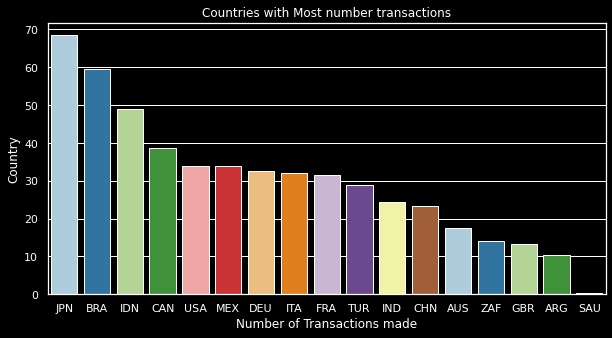

In [9]:
data_2020_g20 = data_2020_g20.sort_values(by='value', ascending=False)
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Country Code', y='value', data= data_2020_g20,palette="Paired")

plt.ylabel('Country')
plt.xlabel('Number of Transactions made')
plt.title('Countries with Most number transactions')
plt.show()

In [47]:
import plotly.express as px
import plotly

fig = px.bar(data_2020_g20, x='Country Code', y='value', color='value', orientation='v',text_auto=True, 
    log_x=False, template=list(plotly.io.templates.keys())[5],
    title= "Countries with Most number transactions")
fig.update_layout(showlegend=True)
fig.show()


In [10]:
#data_2020_g20_pie = data_2020_g20['Country Name','Region']

In [48]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
size = 0.3

ax.pie(data_2020_g20.groupby('Region', sort=False)['value'].sum(), radius=1, colors=outer_colors, labels=data_2020_g20['Region'].drop_duplicates(), autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(data_2020_g20['value'], radius=1-size, colors=inner_colors, labels=data_2020_g20['Country Name'], autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Distribution 1 and 2')
plt.show()


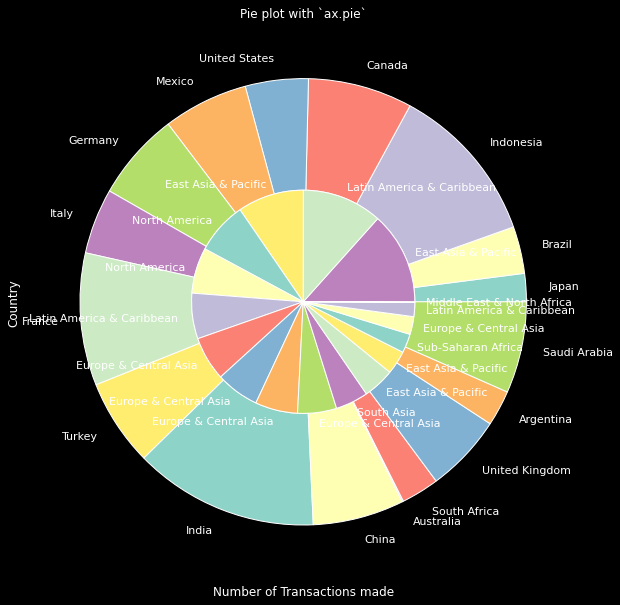

In [12]:

fig, ax = plt.subplots(figsize=(10,15))
size = 0.5


ax.pie(data_2020_g20.groupby('Country Name')['value'].sum(), radius=1, labels=data_2020_g20['Country Name'],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(data_2020_g20['value'], radius=1-size, labels=data_2020_g20['Region'],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.ylabel('Country')
plt.xlabel('Number of Transactions made')
plt.show()

In [72]:
import plotly.graph_objs as go


common_props = dict(labels=data_2020_g20['Country Name'],
                    values=data_2020_g20['value'])

trace1 = go.Pie(
    hole=0.5,
    sort=False,
    direction='clockwise',
    domain={'x': [0.15, 0.85], 'y': [0.15, 0.85]},
    values=data_2020_g20['value'],
    textinfo='label',
    textposition='inside',
    marker={'line': {'color': 'white', 'width': 1}}
)

trace2 = go.Pie(
    hole=0.7,
    sort=False,
    direction='clockwise',
    values=data_2020_g20['value'],
    labels=data_2020_g20['Country Name'],
    textinfo='label',
    textposition='outside',
    marker={'colors': ['green', 'red', 'blue'],
            'line': {'color': 'white', 'width': 1}}
)

fig = go.FigureWidget(data=[trace1, trace2])
fig

FigureWidget({
    'data': [{'direction': 'clockwise',
              'domain': {'x': [0.15, 0.85], 'y': [0.15,…

In [13]:
sns.set(rc={'figure.figsize':(20,10)})


<Figure size 1440x720 with 0 Axes>

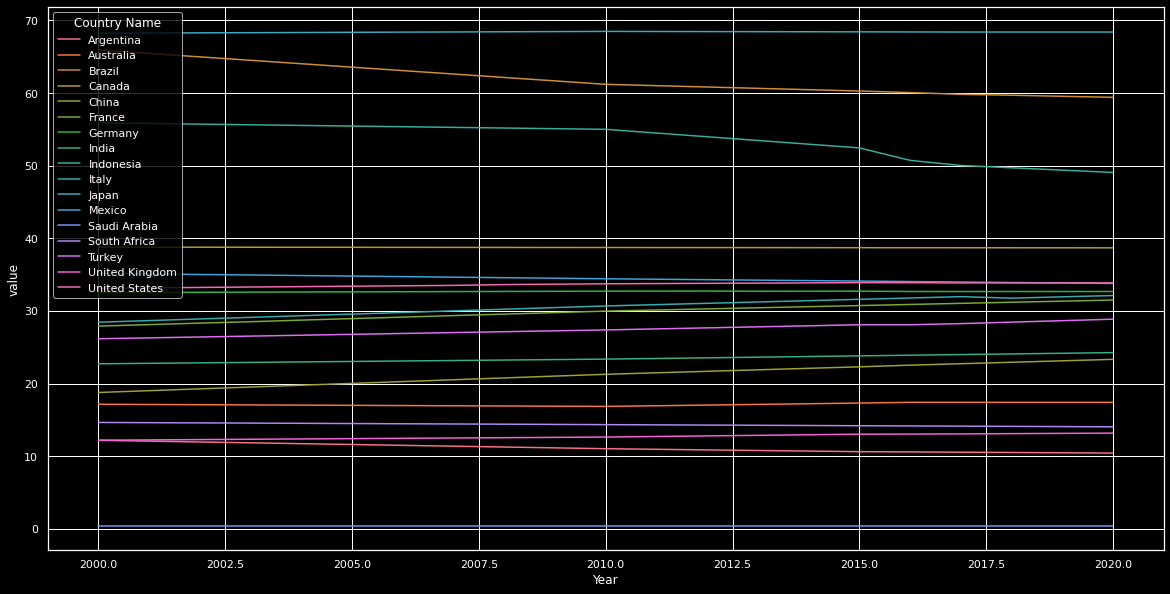

<Figure size 1440x720 with 0 Axes>

In [14]:
plt.style.use('dark_background')
sns.lineplot(x="Year", y="value", hue="Country Name", data=data_g20)
plt.figure(figsize=(20,10))



# New Section

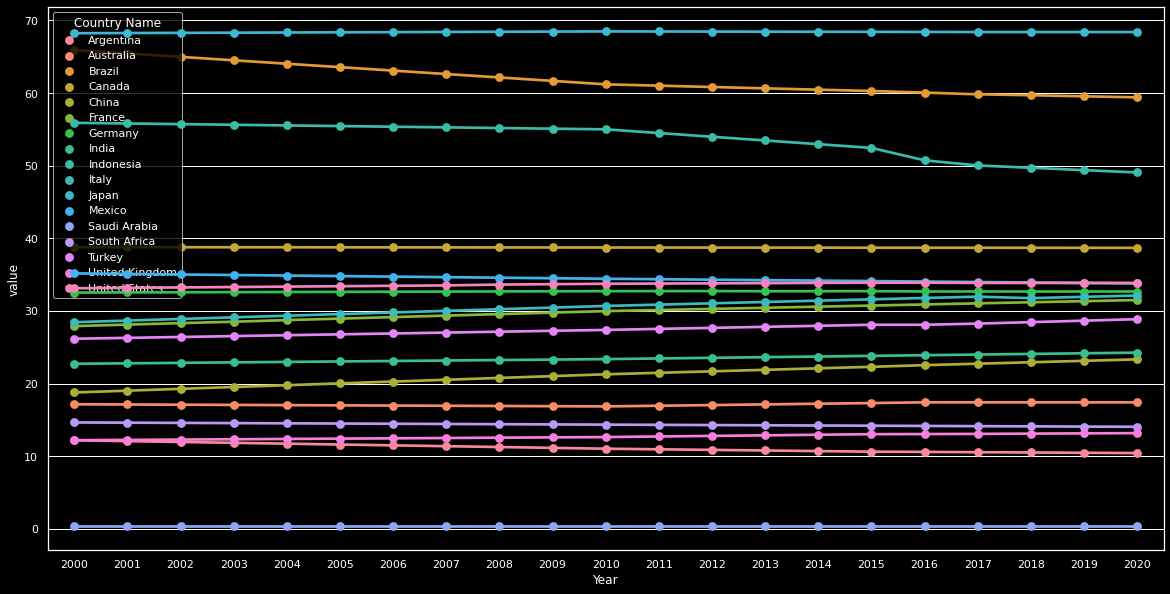

In [15]:
plt.style.use('dark_background')
sns.pointplot(x="Year", y="value", hue='Country Name', data=data_g20)


In [63]:
fig = px.line(
    data_g20,
    x= "Year",
    y= "value",
    height= 600,
    template=list(plotly.io.templates.keys())[5], color='Country Name', orientation='v', markers=True,
    title= "Population, female (% of total population) in India"
)
fig.update_layout(showlegend= True)
fig.show()

## Agriculture

In [16]:
data1 = pd.read_csv("/content/wdi_data_AGR.csv") #importing data
data1.head()


,Unnamed: 0,Year,value,indicator,Country Code,Country Name,Region,Income Group,Lending Type
0,0,2000,57.827099,AG.LND.AGRI.ZS,AFG,Afghanistan,South Asia,Low income,IDA
1,1,2001,57.827099,AG.LND.AGRI.ZS,AFG,Afghanistan,South Asia,Low income,IDA
2,2,2002,57.827099,AG.LND.AGRI.ZS,AFG,Afghanistan,South Asia,Low income,IDA
3,3,2003,58.067580,AG.LND.AGRI.ZS,AFG,Afghanistan,South Asia,Low income,IDA
4,4,2004,58.069111,AG.LND.AGRI.ZS,AFG,Afghanistan,South Asia,Low income,IDA


In [17]:
data_AGR_g20 = data1[data1['Country Name'].isin(G20)]
data_AGR_g20.head()

,Unnamed: 0,Year,value,indicator,Country Code,Country Name,Region,Income Group,Lending Type
133,133,2000,46.958187,AG.LND.AGRI.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
134,134,2001,46.993266,AG.LND.AGRI.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
135,135,2002,47.031268,AG.LND.AGRI.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
136,136,2003,47.825475,AG.LND.AGRI.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
137,137,2004,49.090324,AG.LND.AGRI.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD


In [18]:
data_AGR_g20_2020 = data_AGR_g20[data_AGR_g20['Year'] == 2018 ]
data_AGR_g20_2020.head()

,Unnamed: 0,Year,value,indicator,Country Code,Country Name,Region,Income Group,Lending Type
151,151,2018,54.360560,AG.LND.AGRI.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
208,208,2018,46.658095,AG.LND.AGRI.ZS,AUS,Australia,East Asia & Pacific,High income,Not classified
512,512,2018,28.341090,AG.LND.AGRI.ZS,BRA,Brazil,Latin America & Caribbean,Upper middle income,IBRD
683,683,2018,6.491374,AG.LND.AGRI.ZS,CAN,Canada,North America,High income,Not classified
797,797,2018,56.079083,AG.LND.AGRI.ZS,CHN,China,East Asia & Pacific,Upper middle income,IBRD


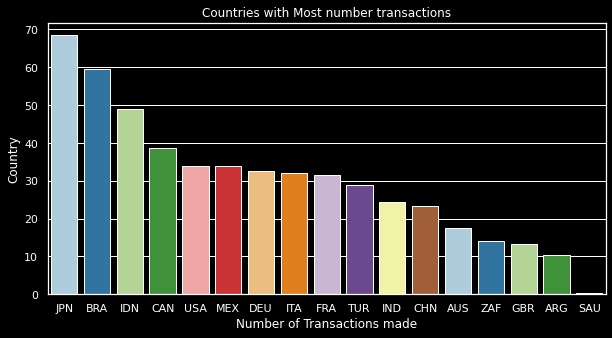

In [19]:
data_AGR_g20_2020 = data_AGR_g20_2020.sort_values(by='value', ascending=False)
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Country Code', y='value', data= data_2020_g20,palette="Paired")

plt.ylabel('Country')
plt.xlabel('Number of Transactions made')
plt.title('Countries with Most number transactions')
plt.show()

In [49]:
fig = px.bar(data_AGR_g20_2020, x='Country Code', y='value', color='value', orientation='v',text_auto=True, 
    log_x=False, template=list(plotly.io.templates.keys())[5],
    title= "Countries with Most number transactions")
fig.update_layout(showlegend=True)
fig.show()

## Greenhouse Gas C02

In [20]:
data2 = pd.read_csv("/content/wdi_data_CO2.csv") #importing data
data2.head()


,Unnamed: 0,Year,value,indicator,Country Code,Country Name,Region,Income Group,Lending Type
0,0,2000,15080,EN.ATM.GHGT.KT.CE,AFG,Afghanistan,South Asia,Low income,IDA
1,1,2001,13490,EN.ATM.GHGT.KT.CE,AFG,Afghanistan,South Asia,Low income,IDA
2,2,2002,16090,EN.ATM.GHGT.KT.CE,AFG,Afghanistan,South Asia,Low income,IDA
3,3,2003,16780,EN.ATM.GHGT.KT.CE,AFG,Afghanistan,South Asia,Low income,IDA
4,4,2004,16520,EN.ATM.GHGT.KT.CE,AFG,Afghanistan,South Asia,Low income,IDA


In [21]:
data_GHG_g20 = data1[data1['Country Name'].isin(G20)]
data_GHG_g20.head()

,Unnamed: 0,Year,value,indicator,Country Code,Country Name,Region,Income Group,Lending Type
133,133,2000,46.958187,AG.LND.AGRI.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
134,134,2001,46.993266,AG.LND.AGRI.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
135,135,2002,47.031268,AG.LND.AGRI.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
136,136,2003,47.825475,AG.LND.AGRI.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
137,137,2004,49.090324,AG.LND.AGRI.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD


In [22]:
data_GHG_g20_2018 = data_GHG_g20[data_GHG_g20['Year'] == 2018 ]
data_GHG_g20_2018.head()

,Unnamed: 0,Year,value,indicator,Country Code,Country Name,Region,Income Group,Lending Type
151,151,2018,54.360560,AG.LND.AGRI.ZS,ARG,Argentina,Latin America & Caribbean,Upper middle income,IBRD
208,208,2018,46.658095,AG.LND.AGRI.ZS,AUS,Australia,East Asia & Pacific,High income,Not classified
512,512,2018,28.341090,AG.LND.AGRI.ZS,BRA,Brazil,Latin America & Caribbean,Upper middle income,IBRD
683,683,2018,6.491374,AG.LND.AGRI.ZS,CAN,Canada,North America,High income,Not classified
797,797,2018,56.079083,AG.LND.AGRI.ZS,CHN,China,East Asia & Pacific,Upper middle income,IBRD


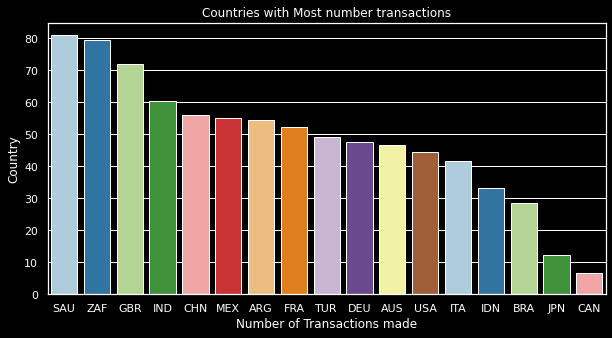

In [23]:
data_GHG_g20_2018 = data_GHG_g20_2018.sort_values(by='value', ascending=False)
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Country Code', y='value', data= data_GHG_g20_2018,palette="Paired")

plt.ylabel('Country')
plt.xlabel('Number of Transactions made')
plt.title('Countries with Most number transactions')
plt.show()

In [50]:
fig = px.bar(data_GHG_g20_2018, x='Country Code', y='value', color='value', orientation='v',text_auto=True, 
    log_x=False, template=list(plotly.io.templates.keys())[5],
    title= "Countries with Most number transactions")
fig.update_layout(showlegend=True)
fig.show()

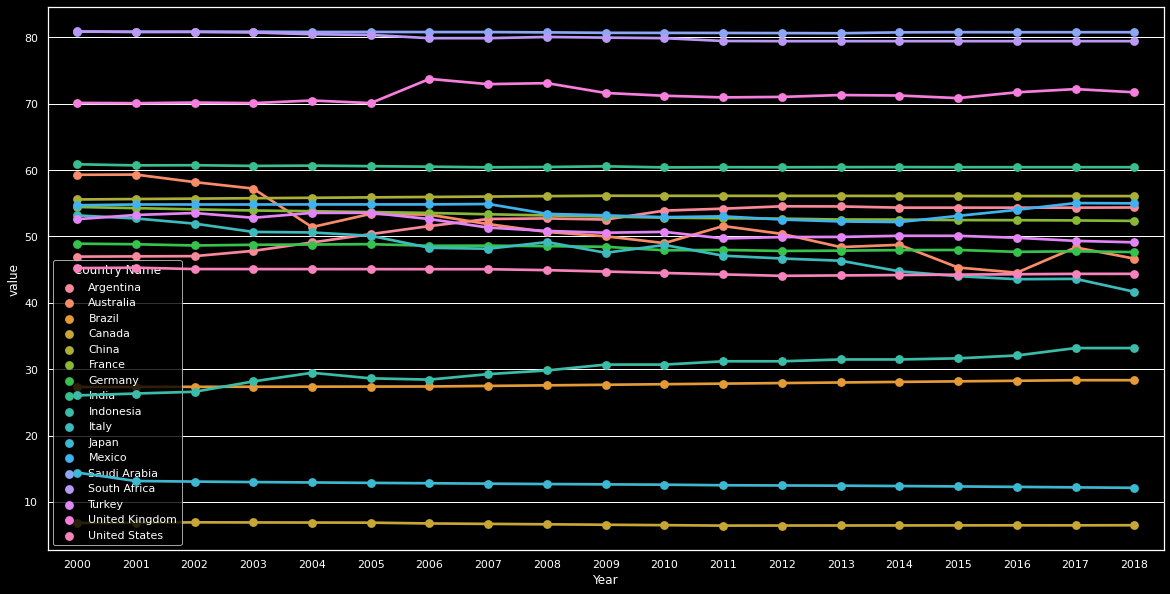

In [24]:
plt.style.use('dark_background')
sns.pointplot(x="Year", y="value", hue='Country Name', data=data_GHG_g20)

In [64]:
fig = px.line(
    data_GHG_g20,
    x= "Year",
    y= "value",
    height= 600,
    template=list(plotly.io.templates.keys())[5], color='Country Name', orientation='v', markers=True,
    title= "Population, female (% of total population) in India"
)
fig.update_layout(showlegend= True)
fig.show()